## Loading and Exploring the Data

In [2]:
# importing libraries for data preprocessing and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz, process

In [3]:
# reading in the ground vehicles file
ground_vehicles = pd.read_excel('/Users/alecavery/Desktop/Govini Assignment/ground_vehicles.xlsx')

In [4]:
# taking a look at the fields to ensure it matches the data dictionary, see amount of non-null values, and look at data types.
# Note: After looking at the info, it looks like we have a few missing Titles, Awarded Amounts, and PSC Names. There are some other
# missing records in other columns, but they don't seem super relevant to our use case.
ground_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54379 entries, 0 to 54378
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          54379 non-null  int64  
 1   Contract Number (IDVPIID)   40102 non-null  object 
 2   Award Number (PIID)         54254 non-null  object 
 3   Modification Number         52895 non-null  object 
 4   Fiscal Year                 54379 non-null  int64  
 5   Title                       54376 non-null  object 
 6   Awarded Amount              53081 non-null  float64
 7   Contracting Office          54379 non-null  object 
 8   Contracting Agency          54379 non-null  object 
 9   Place of Performance State  52007 non-null  object 
 10  Place of Performance City   52007 non-null  object 
 11  Vendor  Name                54379 non-null  object 
 12  Vendor  Top Name            54379 non-null  object 
 13  PSC Name                    536

In [5]:
ground_vehicles.describe()

,ID,Fiscal Year,Awarded Amount
count,5.437900e+04,54379.000000,5.308100e+04
mean,4.514616e+08,2018.041983,5.418603e+05
std,1.532453e+08,1.612579,1.281868e+07
min,2.619012e+08,2016.000000,-4.170755e+08
25%,2.991626e+08,2017.000000,1.229180e+03
50%,4.629981e+08,2018.000000,6.021000e+03
75%,5.998319e+08,2019.000000,1.100173e+04
max,6.765542e+08,2021.000000,1.698640e+09


In [6]:
ground_vehicles.columns = [col.replace("  ", " ") for col in ground_vehicles.columns]

In [7]:
# looking at different parts of the data set. I noticed that Stryker in last row refers to medical equipment and the contractor is the VA
# not DoD, so we'll likely have to remove those types of records.
ground_vehicles.head()

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name
0,261901205,NaN,SPE4A616M0117,NaN,2016,"BEARING,PLAIN,SPHER",NaN,DLA Aviation (formerly Defense Supply Center R...,US Department of Defense (DoD),NaN,NaN,Longhorn Regional Service Center LLC,Longhorn Regional Service Center LLC,(31) BEARINGS
1,261915422,NaN,VA26014P1360,P00003,2016,PREVENTATIVE MAINTENANCE SERVICES ON NEPTUNE U...,25990.00,VISN 20: Northwest Network,US Department of Veterans Affairs (VA),OR,Portland,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
2,261916094,NaN,VA25912C0281,P00004,2016,IGF::CT::IGF STRYKER SERVICE PLAN FOR VA FORT ...,13053.38,VISN 19: Rocky Mountain Network,US Department of Veterans Affairs (VA),MI,Portage,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
3,261919276,NaN,VA25115C0125,P00001,2016,IGF::OT::IGF MAINTENANCE OF PATIENT BEDS OPTIO...,16356.00,VA Ann Arbor Healthcare System,US Department of Veterans Affairs (VA),MI,Ann Arbor,"Imaging Diagnostics, Inc.","Imaging Diagnostics, Inc.",(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
4,261919325,NaN,VA25114C0139,P00001,2016,IGF::OT::IGF MAINTENANCE OF STRYKER NAV II SYSTEM,68023.62,VA Ann Arbor Healthcare System,US Department of Veterans Affairs (VA),MI,Ann Arbor,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...


In [8]:
# looking at different parts of the data set. Looks like the data set includes FY2021, which we'll have to remove.
ground_vehicles.tail()

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name
54374,676404110,NaN,FA489017C0005,P00046,2021,PROGRAM MANAGEMENT SUPPORT- ALL ACTIVITIES REQ...,0.00,US Department of the Air Force,US Department of Defense (DoD),SC,Shaw AFB,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54375,676404111,NaN,FA489017C0005,P00046,2021,WAR RESERVE MATERIEL - FUNDING ONLY ACTION (FU...,2563626.87,US Department of the Air Force,US Department of Defense (DoD),SC,Shaw AFB,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54376,676404112,NaN,FA489017C0005,P00046,2021,WAR RESERVE MATERIEL - FUNDING ONLY ACTION (FU...,0.00,US Department of the Air Force,US Department of Defense (DoD),SC,Shaw AFB,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54377,676547655,NaN,75H71221C00019,0,2021,PROVIDE RENTAL OR LEASE OF ENDOSCOPIC VIDEO TO...,226322.40,IHS - Phoenix Area Office,US Department of Health and Human Services (HHS),AZ,Phoenix,"Stryker Sales, LLC",Stryker Corporation,NaN
54378,676554198,36F79721D0021,36C24821N1079,0,2021,EBB LSV 5 PASSENGER STRETCHER PO: 672A10096,26000.00,US Department of Veterans Affairs (VA),US Department of Veterans Affairs (VA),MI,Portage,Stryker Corporation,Stryker Corporation,"(6515) MEDICAL AND SURGICAL INSTRUMENTS, EQUIP..."


In [9]:
# looking at different parts of the data set
ground_vehicles.sample(5)

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name
49659,652777336,SPE2DE17D7050,SPE2D620F0EBK,0,2020,4551259812 CASCADIA CERVICAL,17838.24,Defense Logistics Agency (DLA),US Department of Defense (DoD),NJ,Mahwah,Howmedica Osteonics Corp.,Stryker Corporation,(6640) LABORATORY EQUIPMENT AND SUPPLIES
36287,565438905,N6523618D8014,N6523619F0146,0,2019,IGF::OT::IGF ND-1,2002189.57,US Department of the Navy,US Department of Defense (DoD),SC,Charleston,Science Applications International Corporation,Science Applications International Corporation,(5999) MISCELLANEOUS ELECTRICAL AND ELECTRONIC...
22230,320112577,NaN,36C26318P0814,0,2018,PROSTHETICS - FUSION IMPLANTS,4272.00,Minneapolis VA Health Care System,US Department of Veterans Affairs (VA),ND,Fargo,Howmedica Osteonics Corp.,Stryker Corporation,"(6515) MEDICAL AND SURGICAL INSTRUMENTS, EQUIP..."
3978,280157800,SPM2DE13D7279,559,0,2016,4533270089 TRIATHLON PKR FEMUR #5 RM/LL,4489.42,Defense Logistics Agency (DLA),US Department of Defense (DoD),NJ,Mahwah,Howmedica Osteonics Corp.,Stryker Corporation,(6640) LABORATORY EQUIPMENT AND SUPPLIES
32787,553825146,SPE2DE17D7005,SPE2D618F2MDB,0,2018,4543442985 KNEES FEMUR HIGH FLEX CEMENTED,7052.71,Defense Logistics Agency (DLA),US Department of Defense (DoD),NJ,Mahwah,Howmedica Osteonics Corp.,Stryker Corporation,(6640) LABORATORY EQUIPMENT AND SUPPLIES


#### Thought: It looks like the first few columns (ID through Modification Number) and Place of Performance State/City aren't super relevant to our use case.

## Data Cleaning and Preprocessing

In [12]:
# taking out the FY2021 rows
ground_vehicles = ground_vehicles[ground_vehicles['Fiscal Year'] < 2021].copy()

In [13]:
ground_vehicles['Fiscal Year'].unique()

array([2016, 2017, 2018, 2019, 2020])

In [14]:
# since there are rows with missing titles and awarded amounts, we should be able to remove those since they can't be used
# for financial analysis.
ground_vehicles = ground_vehicles.dropna(subset=['Title', 'Awarded Amount']).copy()

In [15]:
ground_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47810 entries, 1 to 53785
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          47810 non-null  int64  
 1   Contract Number (IDVPIID)   36025 non-null  object 
 2   Award Number (PIID)         47722 non-null  object 
 3   Modification Number         47630 non-null  object 
 4   Fiscal Year                 47810 non-null  int64  
 5   Title                       47810 non-null  object 
 6   Awarded Amount              47810 non-null  float64
 7   Contracting Office          47810 non-null  object 
 8   Contracting Agency          47810 non-null  object 
 9   Place of Performance State  46809 non-null  object 
 10  Place of Performance City   46809 non-null  object 
 11  Vendor Name                 47810 non-null  object 
 12  Vendor Top Name             47810 non-null  object 
 13  PSC Name                    47622 no

In [16]:
ground_vehicles['Contracting Agency'].unique()

array(['US Department of Veterans Affairs (VA)',
       'US Department of Agriculture (USDA)',
       'US Department of Homeland Security (DHS)',
       'US Department of Health and Human Services (HHS)',
       'Port Authority of New York and New Jersey',
       'US Department of the Interior (DOI)', 'State of Illinois',
       'State of California', 'City of Los Angeles',
       'US Department of Justice (DOJ)',
       'Metropolitan Water Reclamation District of Greater Chicago',
       'Government of Canada', 'Government Accountability Office (GAO)',
       'US Department of Transportation (DOT)',
       'National Transportation Safety Board (NTSB)',
       'US Department of Defense (DoD)', 'US Department of the Treasury',
       'US Department of State (DOS)',
       'United States General Services Administration (GSA)',
       'US Department of Commerce (DOC)',
       'The National Aeronautics and Space Administration (NASA)',
       'Smithsonian Institution',
       'US Departmen

In [17]:
# removing any records that don't have the DoD as the contracting agency
ground_vehicles = ground_vehicles[ground_vehicles['Contracting Agency'] == 'US Department of Defense (DoD)'].copy()

In [18]:
ground_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33723 entries, 745 to 53094
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          33723 non-null  int64  
 1   Contract Number (IDVPIID)   27229 non-null  object 
 2   Award Number (PIID)         33723 non-null  object 
 3   Modification Number         33723 non-null  object 
 4   Fiscal Year                 33723 non-null  int64  
 5   Title                       33723 non-null  object 
 6   Awarded Amount              33723 non-null  float64
 7   Contracting Office          33723 non-null  object 
 8   Contracting Agency          33723 non-null  object 
 9   Place of Performance State  32978 non-null  object 
 10  Place of Performance City   32978 non-null  object 
 11  Vendor Name                 33723 non-null  object 
 12  Vendor Top Name             33723 non-null  object 
 13  PSC Name                    33719 

In [19]:
# making a list of all the base models and variants that show up in the excel. Shortening the list by 
# chopping off the end of some variants (ex. M112 will search for M1126, M1127, etc.). Excluded a few that returned no results.
abrams_variants = ['abrams', 'xm1', 'm1a1', 'm1a2']
bradley_variants = ['bradley', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'bfist', 'black knight', 'ampv']
stryker_variants = ['stryker', 'm112', 'm113', 'm129', 'icv-d', 'm-shorad', 'dvh']
gcs_program_keywords = list(set(abrams_variants + bradley_variants + stryker_variants))
print(gcs_program_keywords)

['dvh', 'm1a2', 'm4', 'm1a1', 'm129', 'm7', 'ampv', 'm3', 'm112', 'abrams', 'm5', 'bfist', 'm113', 'stryker', 'xm1', 'm-shorad', 'm6', 'black knight', 'icv-d', 'm2', 'bradley']


In [20]:
# creating a regex pattern for searching the Title column
pattern = '|'.join([re.escape(k) for k in gcs_program_keywords])

In [21]:
print(pattern)

dvh|m1a2|m4|m1a1|m129|m7|ampv|m3|m112|abrams|m5|bfist|m113|stryker|xm1|m\-shorad|m6|black\ knight|icv\-d|m2|bradley


In [22]:
# filtering the data set to only show titles that include keywords from Abrams, Bradly, and Stryker
ground_vehicles_filtered = ground_vehicles[ground_vehicles['Title'].str.lower().str.contains(pattern, case=False, na=False)].copy()

In [23]:
# removing Beacon Point Associates LLC because they're a medical distributor
ground_vehicles_filtered = ground_vehicles_filtered[~ground_vehicles_filtered['Vendor Top Name'].str.contains('Beacon Point Associates LLC', case=False, na=False)].copy()

In [24]:
# removing all mention of medical equipment
ground_vehicles_filtered = ground_vehicles_filtered[~ground_vehicles_filtered['PSC Name'].str.contains('MEDICAL|LABORATORY|DENTAL|VETERINARY', case=False, na=False)].copy()

In [25]:
ground_vehicles_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738 entries, 750 to 50255
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1738 non-null   int64  
 1   Contract Number (IDVPIID)   871 non-null    object 
 2   Award Number (PIID)         1738 non-null   object 
 3   Modification Number         1738 non-null   object 
 4   Fiscal Year                 1738 non-null   int64  
 5   Title                       1738 non-null   object 
 6   Awarded Amount              1738 non-null   float64
 7   Contracting Office          1738 non-null   object 
 8   Contracting Agency          1738 non-null   object 
 9   Place of Performance State  1685 non-null   object 
 10  Place of Performance City   1685 non-null   object 
 11  Vendor Name                 1738 non-null   object 
 12  Vendor Top Name             1738 non-null   object 
 13  PSC Name                    1738 no

In [26]:
ground_vehicles_filtered.head()

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name
750,273462205,W56HZV09AA904,3,5,2016,THE PURPOSE OF TASK ORDER 0003 UNDER CONTRACT ...,0.00,US Department of the Army,US Department of Defense (DoD),FL,Fort Walton Beach,Jacobs Technology Inc.,Jacobs Engineering Group Inc.,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
752,273462791,W900KK09D0314,13,14,2016,MOBILE M1A2 SEP V2 AGTS SYSTEMS,0.00,US Army Program Executive Office for Simulatio...,US Department of Defense (DoD),FL,Orlando,Lockheed Martin Corporation,Lockheed Martin Corporation,(6920) ARMAMENT TRAINING DEVICES
755,273464373,NaN,FA442715M0013,P00002,2016,IGF::OT::IGF LGCC STRYKER NEPTUNE LOA MOD,21060.00,US Department of the Air Force,US Department of Defense (DoD),MI,Portage,Stryker Corporation,Stryker Corporation,(J099) MAINT/REPAIR/REBUILD OF EQUIPMENT- MISC...
797,273613892,NaN,SPRDL116C0010,0,2016,"HOUSING ASSEMBLY, NSN 2520-01-518-9496, IN SUP...",3959584.86,DLA Land - Warren,US Department of Defense (DoD),IN,Indianapolis,"Allison Transmission, Inc.","Allison Transmission Holdings, Inc.",(2520) VEHICULAR POWER TRANSMISSION COMPONENTS
807,273623650,NaN,SPRDL116C0015,0,2016,* CONTRACT SPRDL1-16-C-0015 O AWARDED 29 AUG 1...,1411695.25,DLA Land - Warren,US Department of Defense (DoD),FL,Boca Raton,"Real-Time Laboratories, LLC",ELBIT SYSTEMS LTD,(1290) MISCELLANEOUS FIRE CONTROL EQUIPMENT


In [27]:
ground_vehicles_filtered.tail()

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name
49727,652819207,NaN,N0018920P0729,0,2020,STRYKER COTS ANNUAL MAINTENANCE FOR BASE AND F...,13998.48,NAVSUP FLC Norfolk,US Department of Defense (DoD),DC,Naval Anacost Annex,Stryker Corporation,Stryker Corporation,(J012) MAINT/REPAIR/REBUILD OF EQUIPMENT- FIRE...
49790,652868286,W56HZV16D0037,15,3,2020,STRYKER STS OVERARCHING SUPPORT DEOBLIGATION,-526794.00,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
49793,652869021,W31P4Q09A0021,15,80,2020,OBSOLESCENCE SUPPORT TO MISSILE DEFENSE AGENCY...,258320.21,"ACC-RSA Redstone Arsenal, AL",US Department of Defense (DoD),AL,Huntsville,"Torch Technologies, Inc.","Torch Technologies, Inc.",(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
49794,652869022,W31P4Q09A0021,15,81,2020,OBSOLESCENCE SUPPORT TO THE BRADLEY FAMILY OF ...,0.00,"ACC-RSA Redstone Arsenal, AL",US Department of Defense (DoD),AL,Huntsville,"Torch Technologies, Inc.","Torch Technologies, Inc.",(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
50255,655663856,W31P4Q16A0009,2,C6,2020,"PROGRAMMATIC SUPPORT TO MST/PFAL, PROGRAMMATIC...",205438.51,"ACC-RSA Redstone Arsenal, AL",US Department of Defense (DoD),AL,Huntsville,Intuitive Research and Technology Corporation,Intuitive Research and Technology Corporation,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...


In [28]:
ground_vehicles_filtered.sample(5)

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name
20206,313211152,NaN,W56HZV15C0099,P00043,2017,BRADLEY SYSTEM TECHNICAL SUPPORT AND SUSTAINME...,7166890.00,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE SYSTEMS PLC,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
44738,626523603,NaN,W56HZV15CA001,P00085,2020,THE PROCUREMENT OF 457 ARMORED MULTI-PURPOSE V...,0.00,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,Bae Systems Land & Armaments L.P.,BAE SYSTEMS PLC,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
44016,623588637,W15QKN19D0017,W15QKN20F0140,0,2020,DELIVERY ORDER FOR CROWS M1A2 VEHICLE INTEGRAT...,811585.86,ACC New Jersey Contracting Center (ACC-PICA),US Department of Defense (DoD),OH,Fairfield,O'Gara-Hess & Eisenhardt Armoring Company LLC,The O'Gara Group Inc,(2541) WEAPONS SYSTEMS SPECIFIC VEHICULAR ACCE...
14776,302897458,SPM8EJ14D0005,18HL,0,2017,4536587426 M113 COMS SYSTEM,317685.15,Defense Logistics Agency (DLA),US Department of Defense (DoD),VA,Virginia Beach,"Atlantic Diving Supply, Inc.","ADS Tactical, Inc.",(4220) MARINE LIFESAVING AND DIVING EQUIPMENT
32054,549679857,W56HZV18D0012,3,2,2018,"THREE-YEAR REQUIREMENTS CONTRACT, FOR THE UPGR...",0.00,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."


In [29]:
# noticed that there are some Vendor Top Names that could be consolidated for reporitng. For example,
# General Dynamics Corp. and General Dynamics Corporation. Using fuzzy matching to normalize them.
unique_vendors = ground_vehicles_filtered['Vendor Top Name'].unique()

vendor_mapping = {}
normalized_names = []

# fuzzy match function to group similar vendor top names
for vendor in unique_vendors:
    match_result = process.extractOne(vendor, normalized_names, scorer=fuzz.token_sort_ratio) if normalized_names else None
    if match_result and match_result[1] >= 85:
        vendor_mapping[vendor] = match_result[0]
    else:
        vendor_mapping[vendor] = vendor
        normalized_names.append(vendor)

ground_vehicles_filtered['Normalized Vendor Name'] = ground_vehicles_filtered['Vendor Top Name'].map(vendor_mapping)

In [30]:
ground_vehicles_filtered.sample(5)

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name,Normalized Vendor Name
32070,549680793,W56HZV16D0037,12,8,2018,STRYKER CONTRACTOR TEST SUPPORT YEAR 3,1.542050e+05,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...,General Dynamics Corporation
20715,317093337,NaN,W900KK17C0001,P00002,2017,IGF::OT::IGF SERVICES-PRICED. BRADLEY CSL UPGR...,1.483664e+06,"ACC-APG Orlando, FL",US Department of Defense (DoD),MI,Auburn Hills,"Oasis Advanced Engineering, Inc.","Oasis Advanced Engineering, Inc.",(6910) TRAINING AIDS,"Oasis Advanced Engineering, Inc."
29526,544527714,NaN,W56HZV18C0133,0,2018,A4 UCA FOR PRODUCTION OF 164 BRADLEY M2A4 AND ...,1.322383e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE SYSTEMS PLC,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,...",BAE SYSTEMS PLC
33524,553969243,W56HZV07DM112,12,53,2018,STRYKER SYSTEMS ENGINEERING SUPPORT (SES),2.745600e+04,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,"GM Gdls Defense Group, L.L.C.",General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,...",General Dynamics Corporation
10563,292818580,NaN,SPRDL116P0267,0,2016,"LINER, HOUSING IN SUPPORT OF THE M1 ABRAMS TAN...",1.954920e+03,DLA Land - Warren,US Department of Defense (DoD),ME,Biddeford,"Precision Screw Machine Products, Inc.","Precision Screw Machine Products, Inc.","(1015) GUNS, 75MM THROUGH 125MM","Precision Screw Machine Products, Inc."


In [31]:
# looking at the top 10 grouped names
ground_vehicles_filtered['Normalized Vendor Name'].value_counts().head(10)

Normalized Vendor Name
General Dynamics Corporation           690
BAE SYSTEMS PLC                        180
LEONARDO SPA                            84
Lockheed Martin Corporation             62
Raytheon Technologies Corporation       57
Honeywell International Inc.            33
Allison Transmission Holdings, Inc.     26
Government of Canada                    25
Gan Corporation                         22
Stryker Corporation                     17
Name: count, dtype: int64

## Data Analysis and Visualization

In [33]:
# applying GCS program to related titles

def classify_gcs(title):
    if any(variant in title.lower() for variant in abrams_variants):
        return 'Abrams'
    elif any(variant in title.lower() for variant in bradley_variants):
        return 'Bradley'
    elif any(variant in title.lower() for variant in stryker_variants):
        return 'Stryker'
    else:
        return 'Other'

# applying function to title field
ground_vehicles_filtered['GCS Program'] = ground_vehicles_filtered['Title'].apply(classify_gcs)
ground_vehicles_filtered['GCS Program'].value_counts().head()

GCS Program
Abrams     824
Stryker    632
Bradley    282
Name: count, dtype: int64

In [34]:
# spending by year
yearly_spend = ground_vehicles_filtered.groupby(['Fiscal Year', 'GCS Program'])['Awarded Amount'].sum().reset_index()
yearly_spend

,Fiscal Year,GCS Program,Awarded Amount
0,2016,Abrams,2.322902e+08
1,2016,Bradley,8.729106e+07
2,2016,Stryker,3.717129e+08
3,2017,Abrams,4.775880e+08
4,2017,Bradley,7.225503e+07
5,2017,Stryker,3.437221e+08
6,2018,Abrams,1.850640e+09
7,2018,Bradley,6.060763e+08
8,2018,Stryker,4.584739e+08
9,2019,Abrams,1.663426e+09


In [35]:
ground_vehicles_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738 entries, 750 to 50255
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1738 non-null   int64  
 1   Contract Number (IDVPIID)   871 non-null    object 
 2   Award Number (PIID)         1738 non-null   object 
 3   Modification Number         1738 non-null   object 
 4   Fiscal Year                 1738 non-null   int64  
 5   Title                       1738 non-null   object 
 6   Awarded Amount              1738 non-null   float64
 7   Contracting Office          1738 non-null   object 
 8   Contracting Agency          1738 non-null   object 
 9   Place of Performance State  1685 non-null   object 
 10  Place of Performance City   1685 non-null   object 
 11  Vendor Name                 1738 non-null   object 
 12  Vendor Top Name             1738 non-null   object 
 13  PSC Name                    1738 no

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

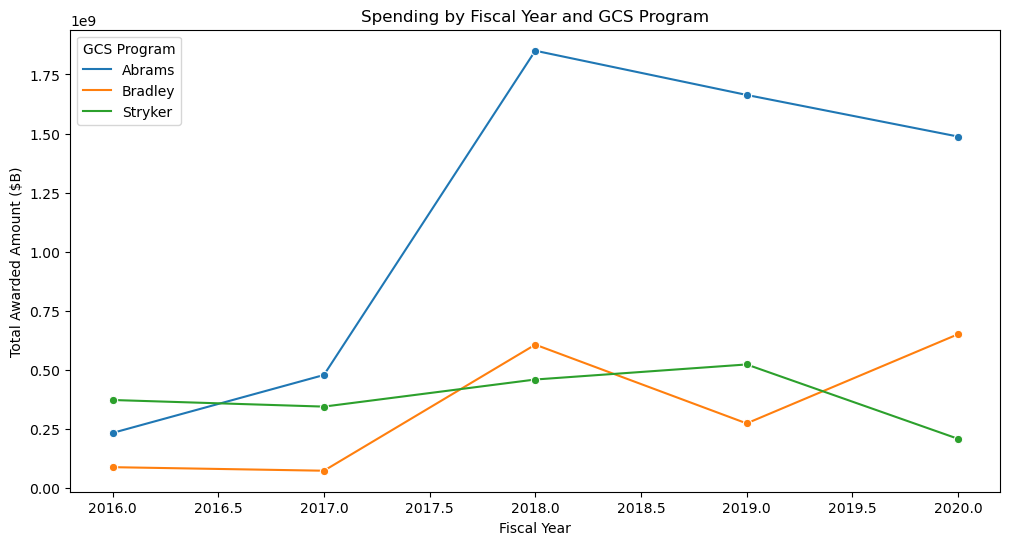

In [36]:
# graph showing yearly spend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_spend, x='Fiscal Year', y='Awarded Amount', hue='GCS Program', marker='o')
plt.title('Spending by Fiscal Year and GCS Program')
plt.ylabel('Total Awarded Amount ($B)')
plt.show()

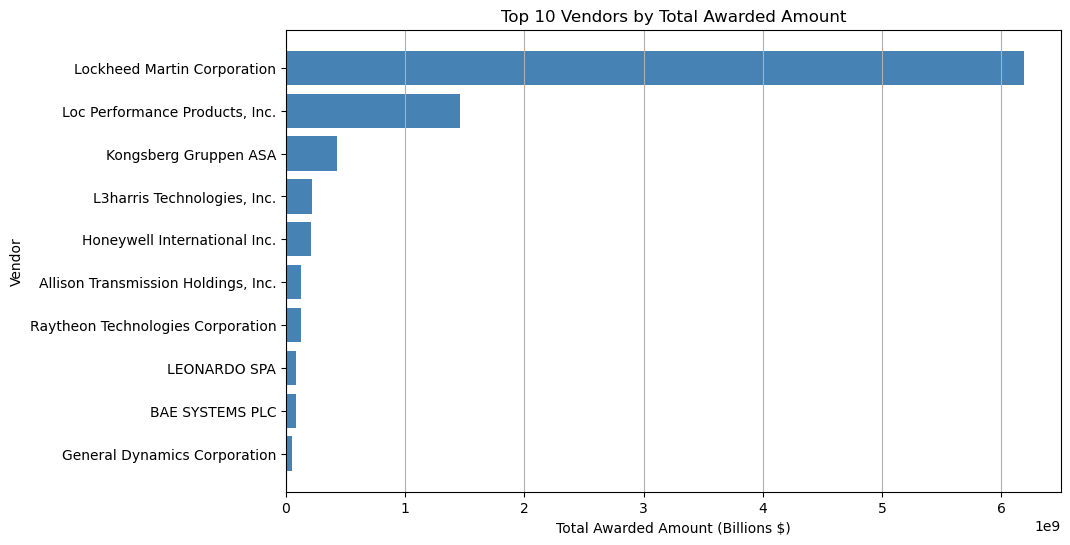

In [37]:
# top vendors by total awarded amount for FY2016-2020
vendor_awards = ground_vehicles_filtered.groupby('Normalized Vendor Name')['Awarded Amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
plt.barh(vendor_awards.index, vendor_awards.sort_values().values, color='steelblue')
plt.title('Top 10 Vendors by Total Awarded Amount')
plt.xlabel('Total Awarded Amount (Billions $)')
plt.ylabel('Vendor')
plt.grid(True, axis='x')
plt.show()

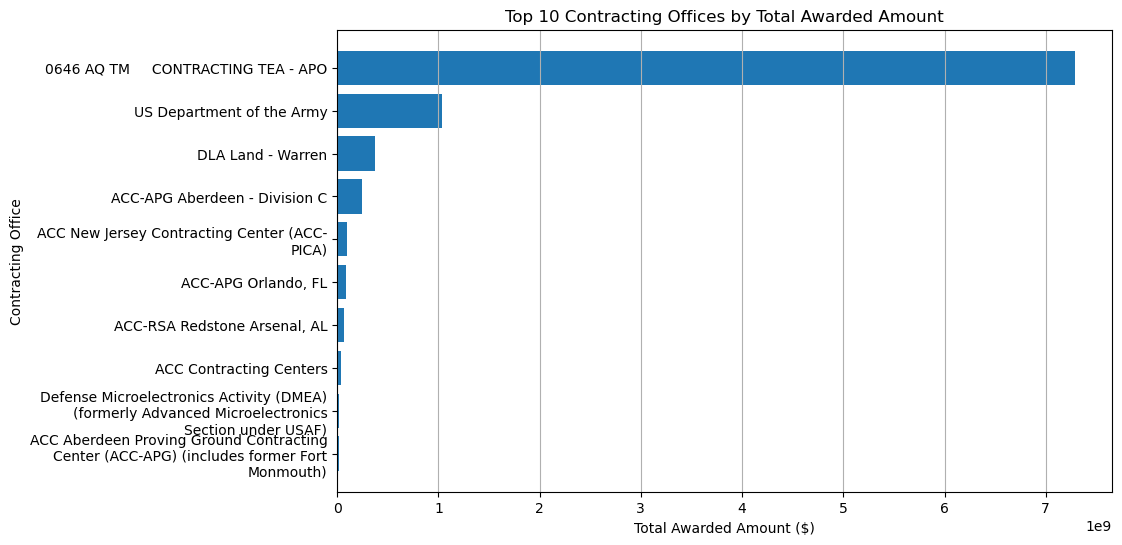

In [38]:
import textwrap

# top contracting offices
office_spending = ground_vehicles_filtered.groupby('Contracting Office')['Awarded Amount'].sum().nlargest(10)

# chart looked very cramped so adding in textwrap
wrapped_labels = ['\n'.join(textwrap.wrap(label, 40)) for label in office_spending.sort_values().index]

plt.figure(figsize=(10, 6))
plt.barh(wrapped_labels, office_spending.sort_values().values)
plt.title('Top 10 Contracting Offices by Total Awarded Amount')
plt.xlabel('Total Awarded Amount ($)')
plt.ylabel('Contracting Office')
plt.grid(True, axis='x')
plt.show()

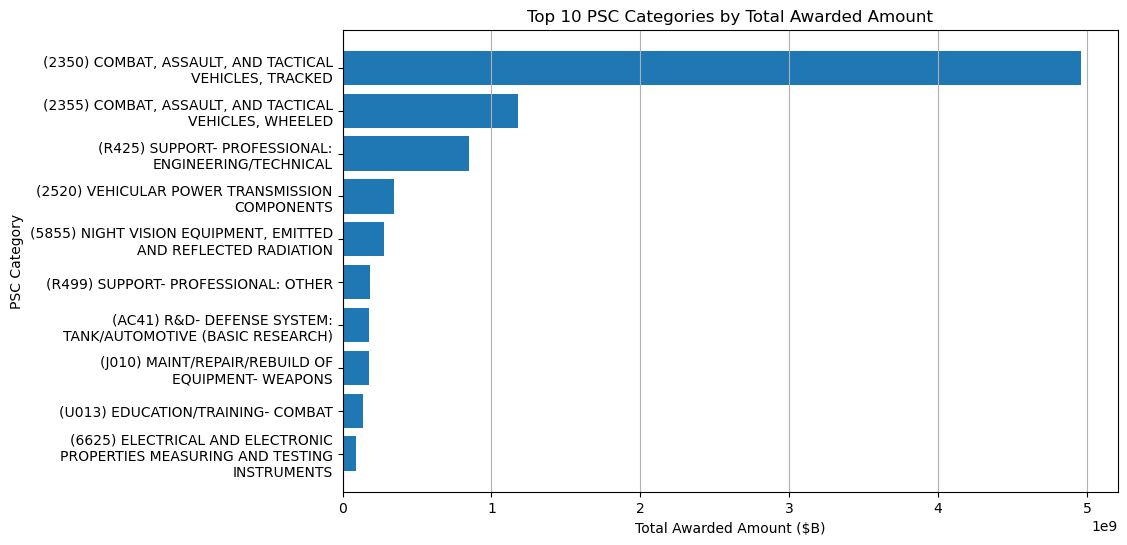

In [39]:
# top PSC categories
psc_amounts = ground_vehicles_filtered.groupby('PSC Name')['Awarded Amount'].sum().nlargest(10)

# chart looked very cramped so adding in textwrap
wrapped_psc_labels = ['\n'.join(textwrap.wrap(label, 40)) for label in psc_amounts.sort_values().index]

plt.figure(figsize=(10, 6))
plt.barh(wrapped_psc_labels, psc_amounts.sort_values().values)
plt.title('Top 10 PSC Categories by Total Awarded Amount')
plt.xlabel('Total Awarded Amount ($B)')
plt.ylabel('PSC Category')
plt.grid(True, axis='x')
plt.show()

In [40]:
# total spending per GCS program across FY16–FY20
total_spending_per_program = ground_vehicles_filtered.groupby('GCS Program')['Awarded Amount'].sum().sort_values(ascending=False)
total_spending_per_program

GCS Program
Abrams     5.711196e+09
Stryker    1.903608e+09
Bradley    1.688437e+09
Name: Awarded Amount, dtype: float64